In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mglearn

# Forge データセット

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


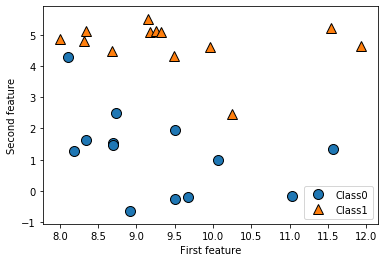

In [2]:
# generate deta set
X, y = mglearn.datasets.make_forge()

# plot data set
mglearn.discrete_scatter (X[:,0], X[:,1], y)
plt.legend(["Class0",  "Class1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print ("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

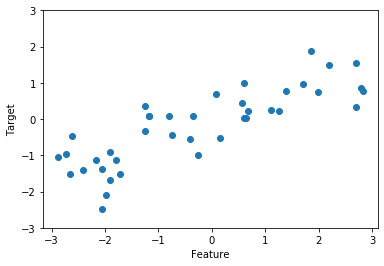

In [3]:
X, y = mglearn.datasets.make_wave (n_samples=40)
plt.plot (X, y, 'o')
plt.ylim (-3,3)
plt.xlabel ("Feature")
plt.ylabel ("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print ("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print ("Shape of cancer data: {}".format (cancer.data.shape))

Shape of cancer data: (569, 30)


In [6]:
print ("Sample counts per class: \n{}".format (
    {n: v for n, v in zip (cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [7]:
print ("Feature names: \n{}".format(cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston

boston = load_boston()
print ("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [9]:
X, y = mglearn.datasets.load_extended_boston ()
print ("X.shape: {}".format(X.shape))

X.shape: (506, 104)


/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


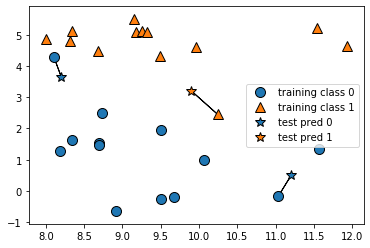

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


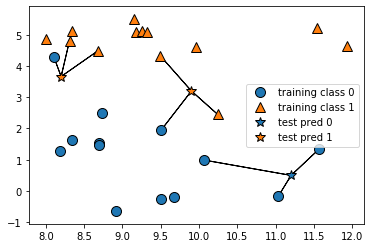

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier (n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
print ("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [16]:
print ("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


In [17]:
print (clf.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


# k-最近傍法のアルゴリズム

https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940

## Ball Tree アルゴリズム

### 3.2.2.2 KNeighbors Classifierの解析

$k$-最近傍法により決定境界を決める手法

$k$ の値が小さいと決定境界は訓練データに近くなり、$k$の値が大きいと滑らかな境界になる

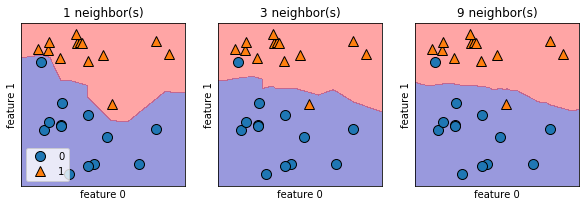

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# zip: [a] -> [b] -> [(a,b)]
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)

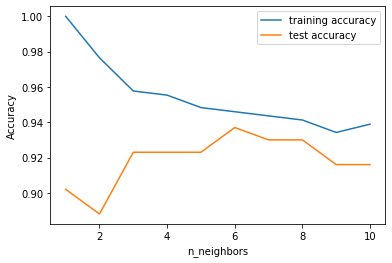

In [21]:
# 汎化性能のプロット
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighbors を1から10まで試す
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### 2.3.2.3 $k$-近傍回帰

$k$-近傍法による回帰

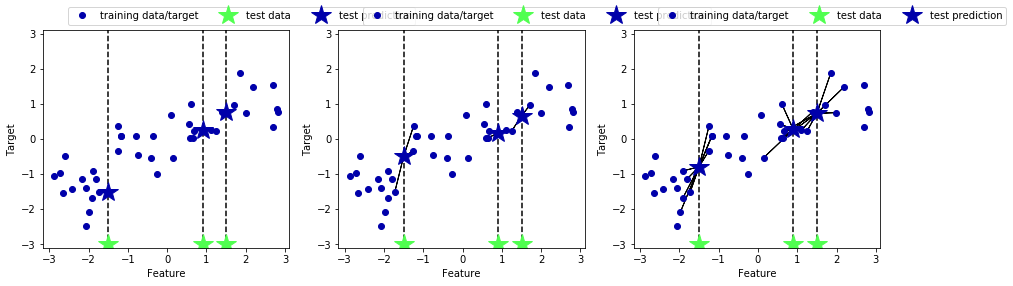

In [22]:
# k-近傍回帰

from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsRegressor
from mglearn.plot_helpers import cm3

def my_plot_knn_regression(n_neighbors=1, ax=None):
    if ax==None:
        ax = plt.gca()
        
    X, y = mglearn.datasets.make_wave(n_samples=40)
    X_test = np.array([[-1.5], [0.9], [1.5]])

    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    y_pred = reg.predict(X_test)

    for x, y_, neighbors in zip(X_test, y_pred, closest.T):
        for neighbor in neighbors[:n_neighbors]:
                ax.arrow(x[0], y_, X[neighbor, 0] - x[0], y[neighbor] - y_,
                          head_width=0, fc='k', ec='k')

    train, = ax.plot(X, y, 'o', c=cm3(0))
    test, = ax.plot(X_test, -3 * np.ones(len(X_test)), '*', c=cm3(2),
                     markersize=20)
    pred, = ax.plot(X_test, y_pred, '*', c=cm3(0), markersize=20)
    ax.vlines(X_test, -3.1, 3.1, linestyle="--")
    ax.legend([train, test, pred],
               ["training data/target", "test data", "test prediction"],
               ncol=3, loc=(.1, 1.025))
    ax.set_ylim(-3.1, 3.1)
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

fig, axes = plt.subplots(1,3,figsize=(15,4))

for n_neighbors, ax in zip ([1,3,9], axes):
    my_plot_knn_regression(n_neighbors=n_neighbors, ax=ax)

In [23]:
X, y = mglearn.datasets.make_wave(n_samples=40)

# wave データセットを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [24]:
print("Test set prodictions:\n{}".format(reg.predict(X_test)))

Test set prodictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [25]:
print('Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

Test set R^2: 0.83


### 2.3.2.4 KNeighborsRegressor の解析

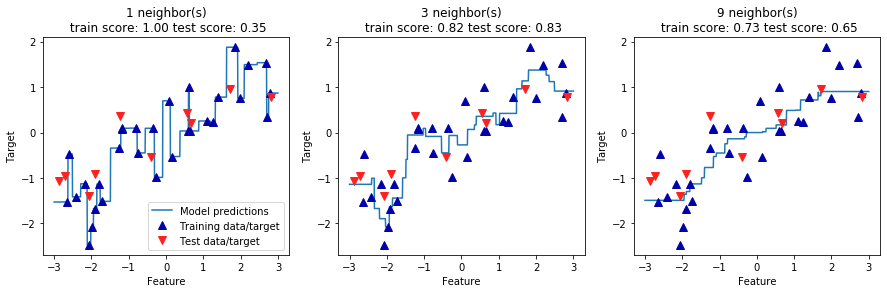

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# -3 から3 までの間に1,000天のデータポイントを作る
line = np.linspace(-3, 3, 1_000).reshape(-1,1)
for n_neighbors, ax in zip ([1, 3, 9], axes):
    # 1, 3, 9 近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test))) 
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

### 2.3.2.5 利点と欠点とパラメータ

- KNeighbors分類きの重要なパラメータ
    - 近傍点の数（チューニングが必要）
    - データポイント間の距離測度（この本の範囲を若干超える、デフォルトではユークリッド距離（厳密にはMinkowsky距離でp=2））

- KNeighborsの利点
    - モデルの理解のしやすさ
    - 調整しなくても十分に高い性能を示す
    - 多くの場合モデル構築は非常に高速
    
- KNeighborsの欠点
    - 訓練セットが大きくなると予測は遅くなる
    - データの前処理が重要
    - 多数の特徴量を持つデータセットではうまく機能しない（$N >> 2^D$)
    - 特徴量の多くが0（疎なデータセット）では特に性能が悪い
 


## 2.3.3 線形モデル

- 実用的に広く用いられている

### 2.3.3.1 線形モデルによる回帰

\begin{align}
    \hat{y} = w^ix_i + b
\end{align}

w[0]: 0.393906  b: -0.031804


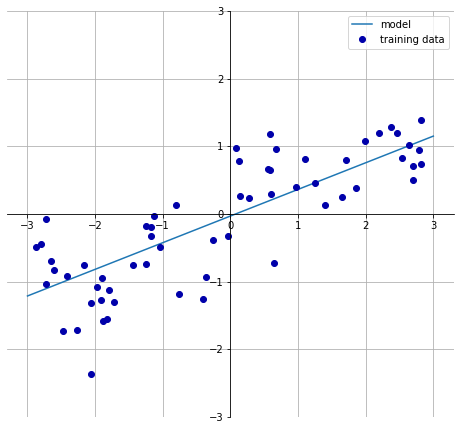

In [27]:
mglearn.plots.plot_linear_regression_wave()

### 3.2.3.2 線形回帰（通常最小二乗法）

\begin{align}
    {minimize}_{\boldsymbol{w},\boldsymbol{b}} \parallel \boldsymbol{y} - \hat{\boldsymbol{y}} \parallel_2^2 \\
    s.t.\quad
    \hat{\boldsymbol{y}} = \boldsymbol{X}\boldsymbol{w} + \boldsymbol{b}
\end{align}

In [28]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [29]:
print("lr.coef_: {}".format(lr.coef_))              # coefficient (w)
print("lr.intercept_: {}".format(lr.intercept_))    # intercept   (b)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [30]:
# 訓練セットとテストセットに対する性能
# 単純すぎるモデルなので適合不足している
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [31]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [32]:
# 過学習している
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


### 2.3.3.3 Ridge Regression

\begin{align*}
    minimize_{\boldsymbol{w}, b}
    \parallel \boldsymbol{y} - \hat{\boldsymbol{y}} \parallel_2^2 + \alpha \parallel \boldsymbol{w} \parallel_2^2
    \\
    s.t.\quad
    \hat{\boldsymbol{y}} = \boldsymbol{X} \boldsymbol{w} + \boldsymbol{b}
\end{align*}

$\alpha$: 正則化パラメータ

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [34]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [35]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


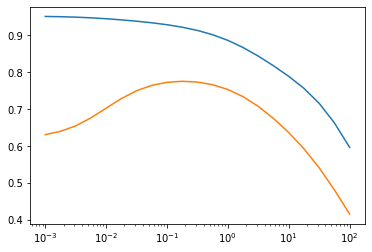

In [45]:
# 正則化パラメータを変えることによる検証
alphas = 10**np.arange(-3,2.25,0.25)
train_scores = np.zeros_like(alphas)
test_scores = np.zeros_like(alphas)

for idx, alpha in enumerate(alphas):
    ridge_local = Ridge(alpha=alpha).fit(X_train, y_train)
    train_scores[idx] = ridge_local.score(X_train, y_train)
    test_scores[idx] = ridge_local.score(X_test, y_test)
    
plt.plot(alphas, train_scores)
plt.plot(alphas, test_scores)
plt.xscale('log')

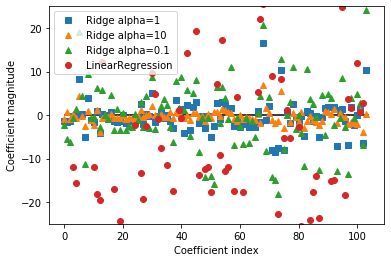

In [37]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, '^', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

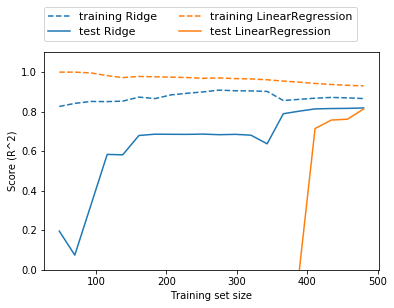

In [38]:
# training set size を変えてスコアがどう変化するか
# sklearn.model_selection.learning_curve を用いてplotしている
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
mglearn.plots.plot_ridge_n_samples()

### 2.3.3.4 Lasso
Least Absolute Shrinkage and Selection Operator

\begin{align*}
    minimize_{\boldsymbol{w},\boldsymbol{b}} \parallel \boldsymbol{y} - \hat{\boldsymbol{y}} \parallel_2^2
    + \alpha \parallel \boldsymbol{w} \parallel_1 \\
    s.t. \quad
    \hat{y} = \boldsymbol{Xw} + \boldsymbol{b}
\end{align*}

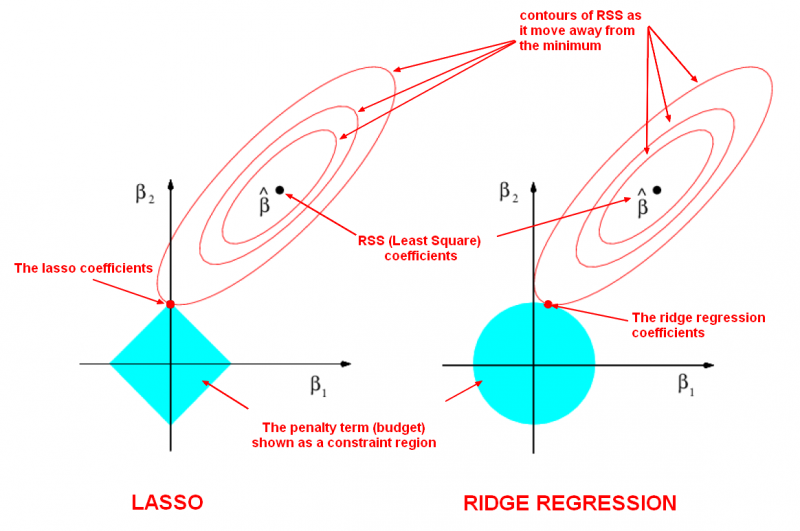

In [1]:
from IPython.display import Image, display_png
display_png(Image("figures/chapter02/20160706172820.png"))     # https://jojoshin.hatenablog.com/entry/2016/07/06/180923

In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [42]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [44]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, '# of features')

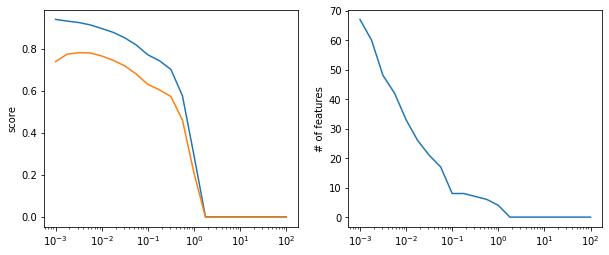

In [49]:
# 正則化パラメータを変えることによる検証
alphas = 10**np.arange(-3,2.25,0.25)
train_scores = np.zeros_like(alphas)
test_scores = np.zeros_like(alphas)
n_features = np.zeros_like(alphas)

for idx, alpha in enumerate(alphas):
    lasso_local = Lasso(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    train_scores[idx] = lasso_local.score(X_train, y_train)
    test_scores[idx] = lasso_local.score(X_test, y_test)
    n_features[idx] = np.sum(lasso_local.coef_ != 0)
    
fig, axes = plt.subplots(1,2,figsize=(10,4))
axes[0].plot(alphas, train_scores)
axes[0].plot(alphas, test_scores)
axes[0].set_xscale('log')
axes[0].set_ylabel("score")

axes[1].plot(alphas, n_features)
axes[1].set_xscale('log')
axes[1].set_ylabel("# of features")

Text(0, 0.5, 'Coefficient magnitude')

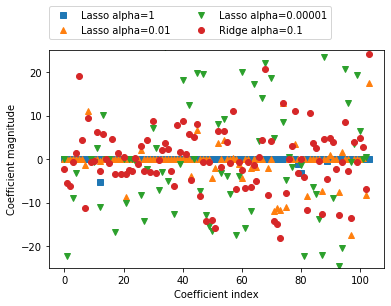

In [50]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.00001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Text(0, 0.5, '# of features')

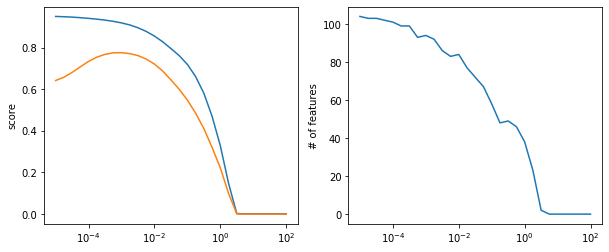

In [52]:
# Elastic net
# 正則化パラメータを変えることによる検証
from sklearn.linear_model import ElasticNet

alphas = 10**np.arange(-5,2.25,0.25)
train_scores = np.zeros_like(alphas)
test_scores = np.zeros_like(alphas)
n_features = np.zeros_like(alphas)

for idx, alpha in enumerate(alphas):
    elastic_local = ElasticNet(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    train_scores[idx] = elastic_local.score(X_train, y_train)
    test_scores[idx] = elastic_local.score(X_test, y_test)
    n_features[idx] = np.sum(elastic_local.coef_ != 0)
    
fig, axes = plt.subplots(1,2,figsize=(10,4))
axes[0].plot(alphas, train_scores)
axes[0].plot(alphas, test_scores)
axes[0].set_xscale('log')
axes[0].set_ylabel("score")

axes[1].plot(alphas, n_features)
axes[1].set_xscale('log')
axes[1].set_ylabel("# of features")

### 2.3.3.5 クラス分類のための線形モデル

2クラス分類
\begin{align*}
    \hat{y}
    = \boldsymbol{w}^{\top} \boldsymbol{x} + b
\end{align*}
として$\hat{y}$ が正か負かでクラス分類を行う。

決定境界は$\hat{y} = 0$ という超平面になる。

線形モデルの学習アルゴリズムは大きく2分される

- 係数と切片の特定の組み合わせと訓練データの適合度を測る尺度
    - クラス分類ミスを最小化するよう$\boldsymbol{w}, b$ を調整したいと思うかもしれないが、技術的・数学的な理由からそれはできない（意味がわからない）
    - ロス関数はあまり意味がない
- 正規化を行うか。行うならどの方法を使うか

最も一般的な線形クラス分類アルゴリズム

- ロジスティック回帰
    - データ$x$ からクラスラベル$y$ が正規分布で生成されると考える
    - 言い換えると、事後分布が正規分布
    - 各クラスの分散共分散行列は固定
- サポートベクトルマシン
    - サポートベクトルを最大化する手法
    - 凸最適化

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


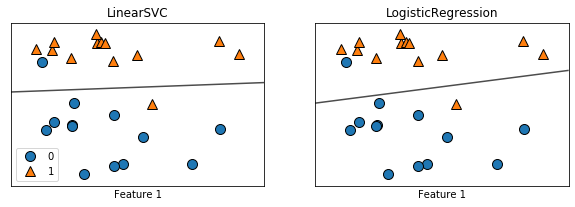

In [55]:
# Logistic regression and support vector machine (support vector classifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip ([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_xlabel("Feature 1")
    
axes[0].legend()

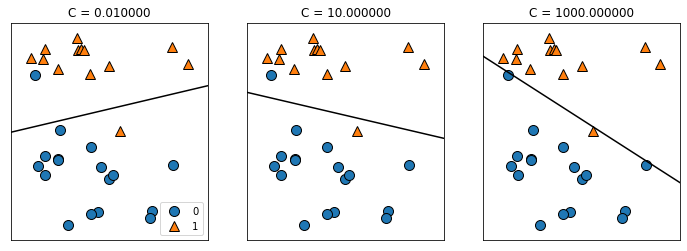

In [56]:
# 正則化パラメータCを変えた場合
mglearn.plots.plot_linear_svc_regularization()

In [57]:
# cancer data set
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score 0.967
Test set score 0.965


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score 0.934
Test set score 0.930


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


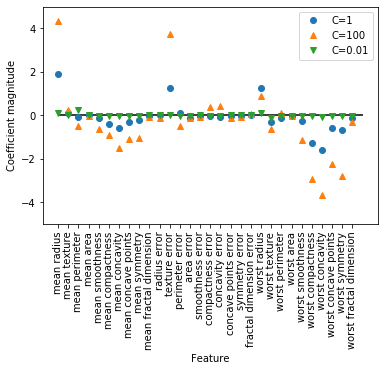

In [72]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

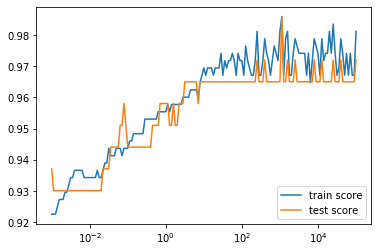

In [71]:
# 正則化パラメータを変えることによる検証
# warining supression
# https://qiita.com/idontwannawork/items/86c5b833cdc0a4cf58b5
Cs = 10**np.arange(-3,5.05,0.05)
train_scores = np.zeros_like(Cs)
test_scores = np.zeros_like(Cs)

for idx, C in enumerate(Cs):
    logreg_local = LogisticRegression(C=C, solver='liblinear').fit(X_train, y_train)
    train_scores[idx] = logreg_local.score(X_train, y_train)
    test_scores[idx] = logreg_local.score(X_test, y_test)
    
plt.plot(Cs, train_scores, label='train score')
plt.plot(Cs, test_scores, label='test score')
plt.xscale('log')
plt.legend(loc=4)

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


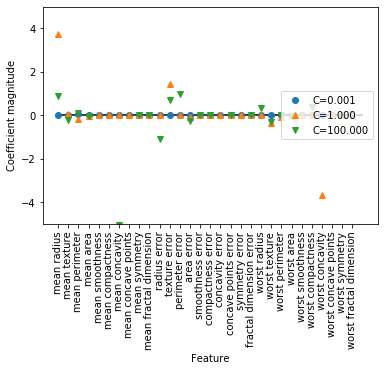

In [77]:
# L1-regularized Logistic Regression
# max_iter was changed
for C, marker in zip ([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear', max_iter=1000).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim (-5, 5)
plt.legend(loc=5)

### 2.3.3.6 線形モデルによる他クラス分類

SVM は他クラス分類に応用できない

クラス分類を他クラス分類に拡張する一般的な手法として1対その他アプローチがある

各クラスに対して、そのクラスと他のクラスの全てのクラスを分類する2クラス分類モデルを学習し、一番高いスコアのクラス分類機が勝ちそのクラスを予測結果とする。

クラスごとに係数ベクトル$w_k$と切片$b_k$ がある
\begin{align*}
    \hat{y}
    = \mathop{arg~max}\limits_{k \in K} \boldsymbol{w}_k^{\top} \boldsymbol{x} + b_k
\end{align*}

他クラスロジスティック回帰の背後にある数学は、1対その他アプローチとは少し異なるが、同じ方法で予測を行うことができる。

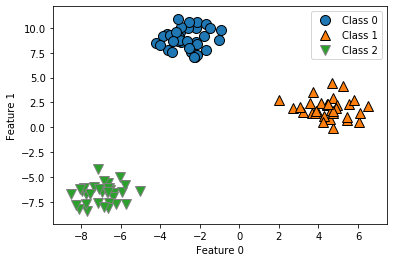

In [80]:
# データセット
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [81]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape:", linear_svm.coef_.shape)
print("Intercept shape:", linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


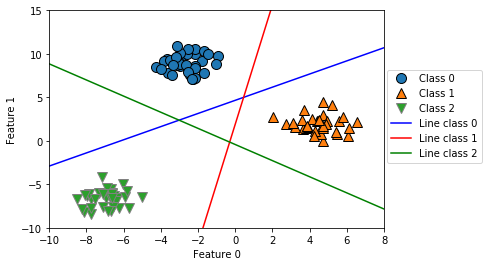

In [82]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip (linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept)/ coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

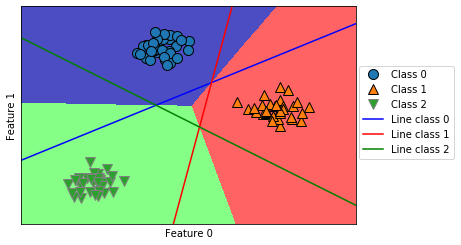

In [83]:
# 中心の三角形をどのように分類するか
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip (linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


### 2.3.3.7 利点、欠点、パラメータ

線形モデルの主要なパラメータは正則化パラメータである。

通常正則化パラメータを調整する際には、対数スケールで変更を行う。

また、一部の特徴量だけが重要だと思うならばL1正則化を使い、そうでなければデフォルトではL2を使った方が良い。

- 線形モデルの利点
    - 訓練、予測が高速
    - 非常に大きいデータセットやスパースなデータに対してもうまく機能する
        - サンプル点が多いときにはsolver='sag'を使うとさらに高速になる場合がある
        - Stochastic Average Gradient
        - （ググっても古い記事(2012-2013)しか出てこないので今はあまり使われてない？
    - さらに大規模なデータに対してはSGDClassifierやSGDRegressorクラスを使う方法がある
- 線形モデルの欠点
    - 特徴量の数がサンプルの個数より多いときに性能を発揮する
    - 低次元空間では、他のモデルの方がいい汎化性能を示すこともある
    - 2.3.7 Kernel SVM
    